# house data description

- id: Unique identifier for each property.
- date: Date when the property was sold.
- price: Sale price of the property.
- bedrooms: Number of bedrooms in the house.
- bathrooms: Number of bathrooms in the house.
- sqft_living: Square footage of the living area.
- sqft_lot: Square footage of the lot.
- floors: Number of floors in the house.
- waterfront: Indicates if the property has a waterfront view (binary: 0 = no, 1 = yes).
- view: Quality of the view from the property (numerical scale).
- condition: Condition of the house (numerical scale).
- grade: Overall grade based on building and design (numerical scale).
- sqft_above: Square footage of the house (excluding the basement).
- sqft_basement: Square footage of the basement.
- yr_built: Year the house was built.
- yr_renovated: Year the house was renovated (0 indicates no renovations).
- zipcode: ZIP code of the property.
- lat: Latitude coordinate of the property.
- long: Longitude coordinate of the property.
- sqft_living15: Average square footage of living area for the 15 nearest neighbors.
- sqft_lot15: Average square footage of lot size for the 15 nearest neighbors

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import  mean_squared_error, mean_absolute_error
# Load the dataset
df = pd.read_csv('house_data (2) - house_data (2).csv')  
df



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [181]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.0,21613.0,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.0,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.116076e+05,3.362791,2.098477,2058.078564,8705.224448,1.494309,0.0,0.0,3.410124,7.598598,1769.563041,284.050155,1971.005136,0.0,98077.939805,47.560053,-122.214908,1975.112849,8298.152917
std,2.500479e+05,0.854105,0.722027,839.307806,5046.482073,0.539989,0.0,0.0,0.648435,1.001234,764.029323,417.064559,29.373411,0.0,53.505026,0.138563,0.137209,648.999108,4363.479209
min,7.500000e+04,1.500000,0.625000,290.000000,520.000000,1.000000,0.0,0.0,1.500000,5.500000,290.000000,0.000000,1900.000000,0.0,98001.000000,47.160500,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5040.000000,1.000000,0.0,0.0,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.0,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7618.000000,1.500000,0.0,0.0,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.0,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,10688.000000,2.000000,0.0,0.0,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.0,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,1.129575e+06,5.500000,3.625000,4234.500000,19160.000000,3.500000,0.0,0.0,5.000000,9.500000,3740.000000,1400.000000,2015.000000,0.0,98199.000000,47.777600,-121.820500,3665.000000,17557.500000


In [29]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [30]:
df.drop_duplicates(inplace=True)

In [53]:
df.date.value_counts()  

date
20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20150131T000000      1
20150117T000000      1
20150308T000000      1
20150515T000000      1
20140803T000000      1
Name: count, Length: 372, dtype: int64

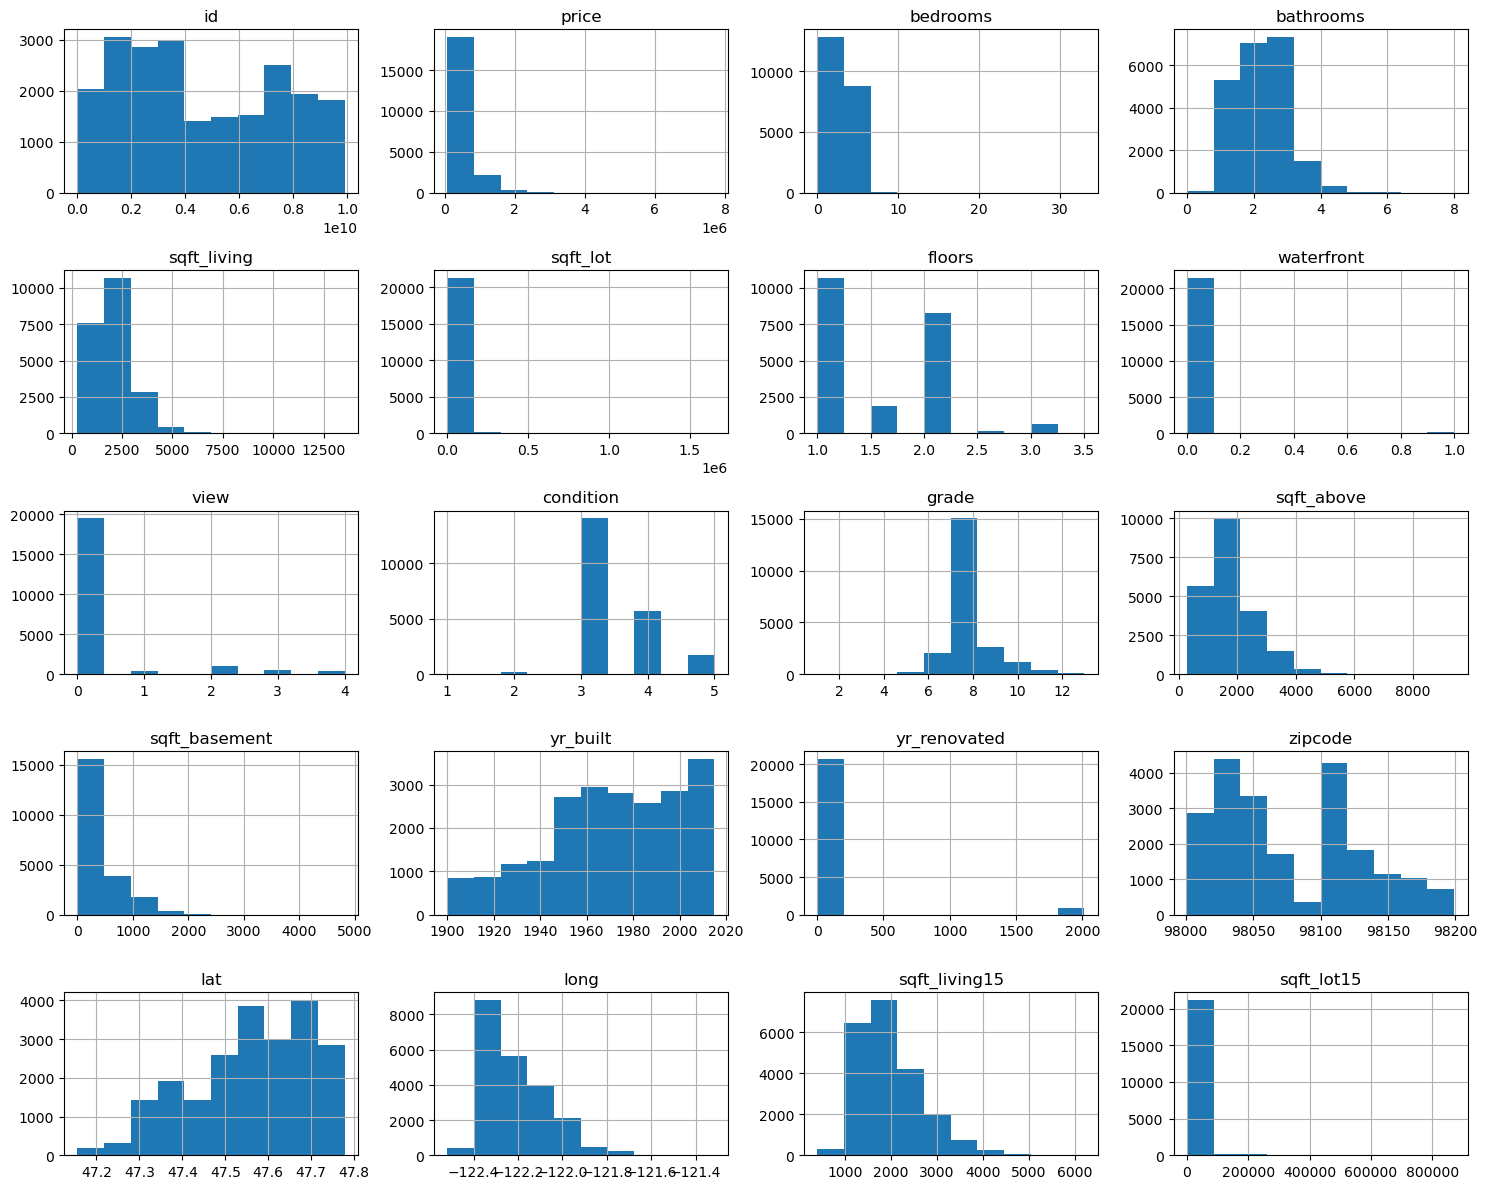

In [47]:
df.hist(figsize=(15,12))
plt.tight_layout()
plt.show() 

In [216]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.352292,0.526766,0.701143,0.172292,0.298720,NaN,NaN,0.041049,0.686601,0.602468,0.294250,0.064248,NaN,-0.043017,0.402479,0.050783,0.626354,0.167142
bedrooms,0.352292,1.000000,0.527859,0.617376,0.194245,0.184460,NaN,NaN,0.023746,0.376826,0.510376,0.303125,0.170449,NaN,-0.165702,-0.015255,0.152064,0.422509,0.183747
bathrooms,0.526766,0.527859,1.000000,0.746207,0.110984,0.514041,NaN,NaN,-0.129227,0.664120,0.673484,0.259800,0.526488,NaN,-0.210991,0.020447,0.240472,0.568519,0.105237
sqft_living,0.701143,0.617376,0.746207,1.000000,0.348589,0.363894,NaN,NaN,-0.060316,0.743257,0.868912,0.399561,0.333555,NaN,-0.206448,0.051304,0.260427,0.763878,0.334951
sqft_lot,0.172292,0.194245,0.110984,0.348589,1.000000,-0.192408,NaN,NaN,0.067827,0.201319,0.320532,0.099345,0.036435,NaN,-0.286511,-0.120522,0.353966,0.391249,0.910903
floors,0.298720,0.184460,0.514041,0.363894,-0.192408,1.000000,NaN,NaN,-0.265389,0.477625,0.542500,-0.256446,0.489319,NaN,-0.059121,0.049616,0.128346,0.282338,-0.195487
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,0.041049,0.023746,-0.129227,-0.060316,0.067827,-0.265389,NaN,NaN,1.000000,-0.152782,-0.164618,0.180211,-0.364141,NaN,0.003328,-0.014860,-0.107651,-0.092840,0.076148
grade,0.686601,0.376826,0.664120,0.743257,0.201319,0.477625,NaN,NaN,-0.152782,1.000000,0.735790,0.136364,0.470996,NaN,-0.191453,0.112239,0.214541,0.698435,0.207675


In [217]:
df.corrwith(df['price']).sort_values(ascending=False)

d:\Users\DELL\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\Users\DELL\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


price            1.000000
sqft_living      0.701143
grade            0.686601
sqft_living15    0.626354
sqft_above       0.602468
bathrooms        0.526766
lat              0.402479
bedrooms         0.352292
floors           0.298720
sqft_basement    0.294250
sqft_lot         0.172292
sqft_lot15       0.167142
yr_built         0.064248
long             0.050783
condition        0.041049
zipcode         -0.043017
waterfront            NaN
view                  NaN
yr_renovated          NaN
dtype: float64

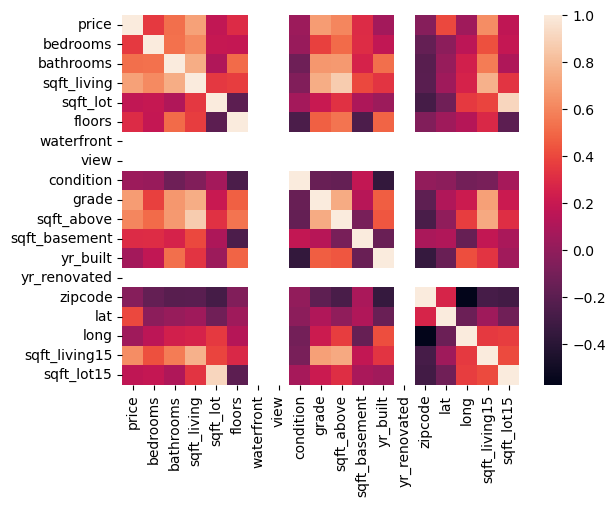

In [ ]:
sns.heatmap(df.corr(), )

plt.show()

In [186]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

## check outlier

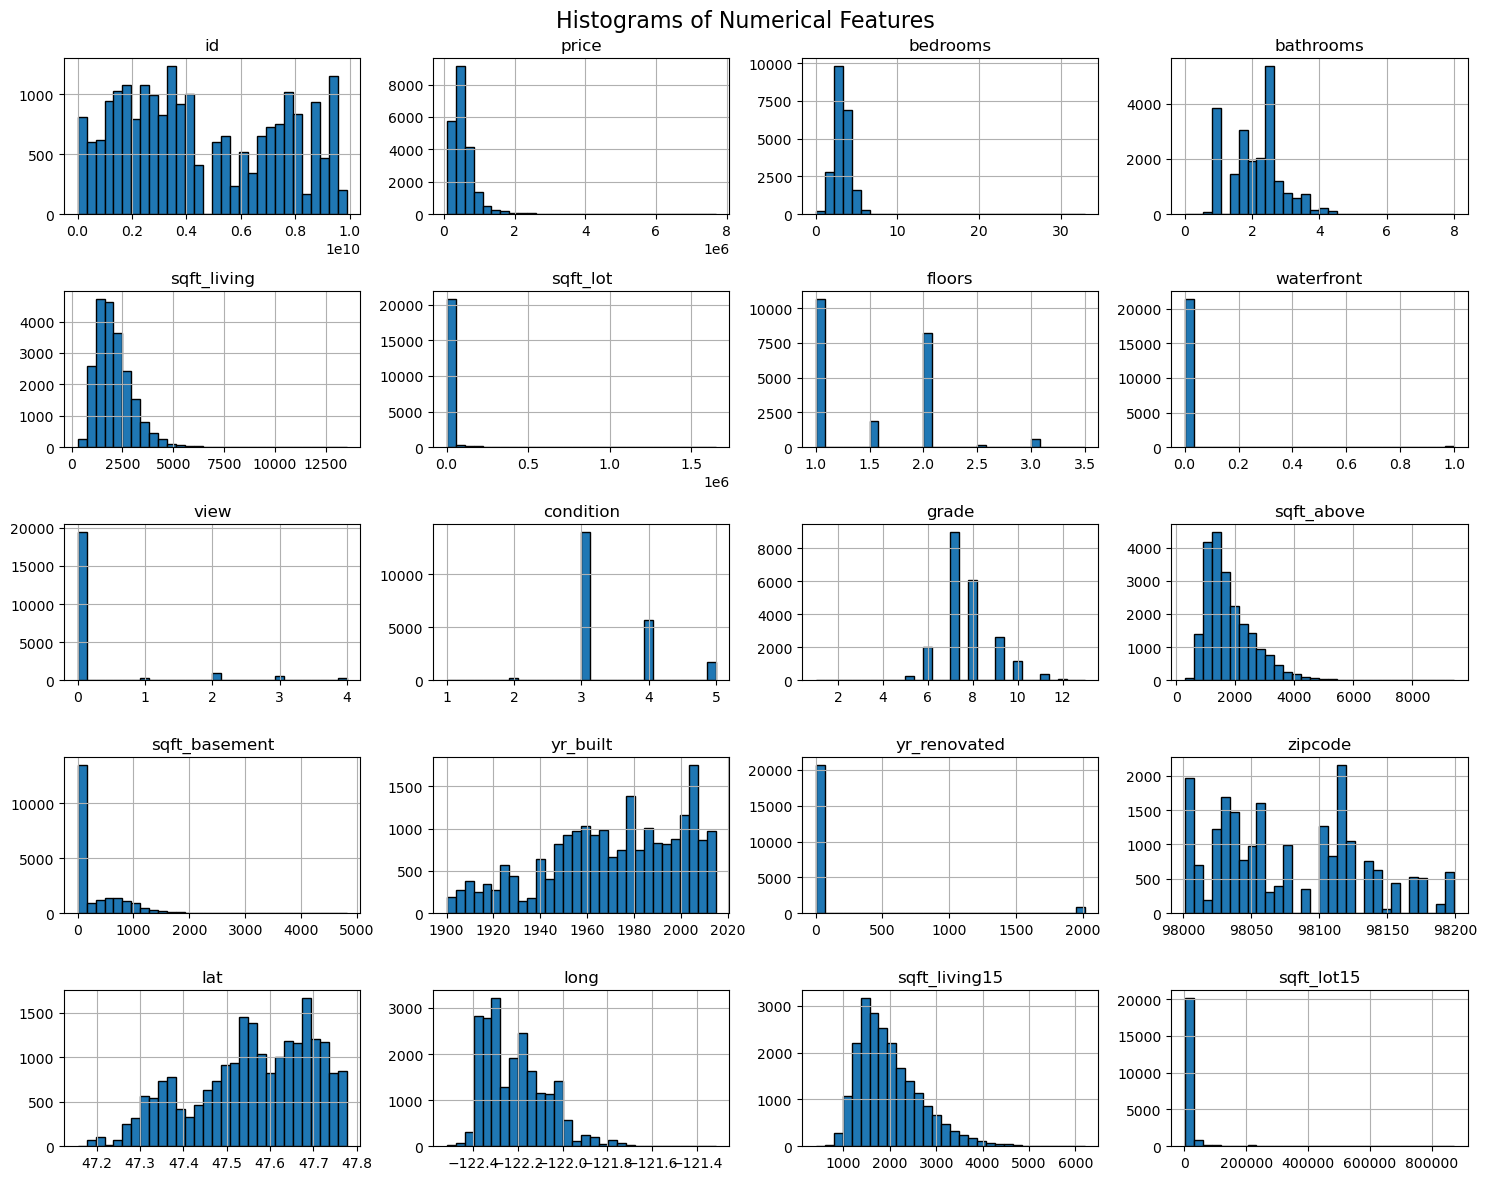

In [188]:
num_cols=df.select_dtypes(include=['int64','float64']).columns

df[num_cols].hist(figsize=(15,12), bins=30, edgecolor='k')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

In [189]:
df.shape   

(21613, 21)

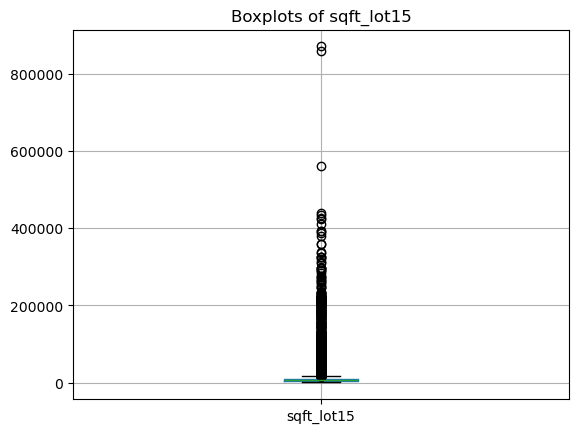

In [190]:
df.boxplot('sqft_lot15')
plt.title('Boxplots of sqft_lot15')    
plt.show()

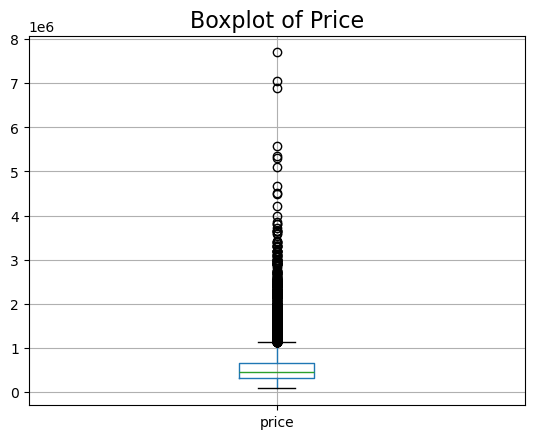

In [97]:
df.boxplot( 'price')
plt.title('Boxplot of Price', fontsize=16)    
plt.show()

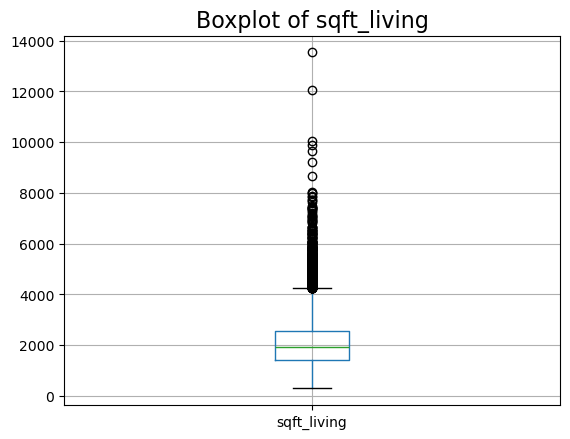

In [99]:
df.boxplot( 'sqft_living')
plt.title('Boxplot of sqft_living', fontsize=16)    
plt.show()

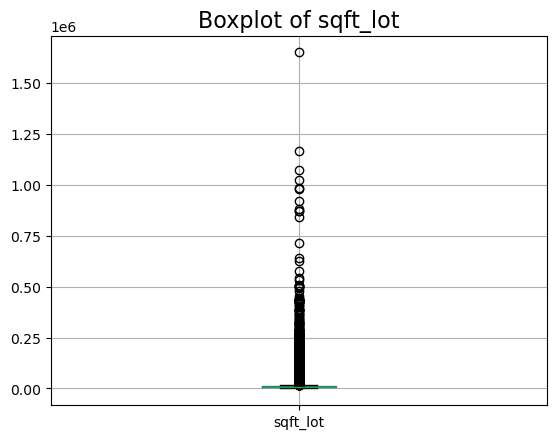

In [101]:
df.boxplot( 'sqft_lot')
plt.title('Boxplot of sqft_lot', fontsize=16)    
plt.show()

In [191]:
numerical_cols = df.select_dtypes(include=np.number).columns
print("Number of outliers in each numerical column:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper= Q3 + 1.5 * IQR
    outliers_count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    print(f"-'{col}': {outliers_count}")

Number of outliers in each numerical column:
-'id': 0
-'price': 1159
-'bedrooms': 546
-'bathrooms': 571
-'sqft_living': 572
-'sqft_lot': 2425
-'floors': 0
-'waterfront': 163
-'view': 2124
-'condition': 30
-'grade': 1911
-'sqft_above': 611
-'sqft_basement': 496
-'yr_built': 0
-'yr_renovated': 914
-'zipcode': 0
-'lat': 2
-'long': 256
-'sqft_living15': 544
-'sqft_lot15': 2194


In [177]:
#numerical_cols = df.select_dtypes(include=np.number).columns

# Step 1: Replace outliers with median
#for col in numerical_cols:
    #Q1 = df[col].quantile(0.25)
    #Q3 = df[col].quantile(0.75)
    #IQR = Q3 - Q1
    #lower = Q1 - 1.5 * IQR
    #upper = Q3 + 1.5 * IQR
    #median = df[col].median()

    #df[col] = np.where((df[col] < lower) | (df[col] > upper), median, df[col])

In [193]:
numerical_cols = df.select_dtypes(include=np.number).columns

# Step 1: Clip outliers to boundaries
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Clip values outside range to the boundaries
    df[col] = np.where(df[col] < lower, lower,
              np.where(df[col] > upper, upper, df[col]))

In [194]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,0.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [195]:
  
df.drop(['id', 'date'], axis=1, inplace=True)

In [196]:
df.reset_index(drop=True, inplace=True)

In [197]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,0.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


## Train Test Spilt

In [198]:
target = 'price'
X = df.drop(columns=[target])
y = df[target]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [201]:
numerical_features = X.select_dtypes(include=np.number).columns

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features)
])
   
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [202]:
model = LinearRegression()
model.fit(X_train_transformed, y_train)



LinearRegression()

In [203]:
y_pred = model.predict(X_test_transformed)
y_pred

array([490519.86532395, 728371.2348651 , 926325.5888912 , ...,
       393650.83145589, 796247.26099073, 593950.12995484])

In [204]:
accuracy = model.score(X_test_transformed, y_test)
accuracy

0.7349666441845617

In [205]:
mae = mean_absolute_error(y_test, y_pred)
mae 

98639.2542086082

In [206]:
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train_transformed, y_train)


RandomForestRegressor(random_state=42)

In [207]:
y_pred = model.predict(X_test_transformed)
y_pred


array([ 385295.5 ,  837389.61, 1052541.15, ...,  334059.14,  994205.25,
        497718.5 ])

In [208]:
accuracy = model.score(X_test_transformed, y_test)
accuracy

0.8822233220246711

In [209]:
mae =mean_absolute_error(y_test, y_pred)
mae 

58518.80583715593

In [210]:
mse =mean_squared_error(y_test, y_pred)
mse 

7473687241.39764

In [211]:
model=GradientBoostingRegressor(n_estimators=100,random_state=42)
model.fit(X_train_transformed, y_train)



GradientBoostingRegressor(random_state=42)

In [212]:
y_pred = model.predict(X_test_transformed)
y_pred

array([409060.65111062, 831793.00675958, 997147.85658742, ...,
       336962.74288822, 872677.88340606, 505391.70236428])

In [213]:
accuracy = model.score(X_test_transformed, y_test)
accuracy

0.865228029743833

In [214]:
mae = mean_absolute_error(y_test, y_pred)
mae 

65742.11998187695

In [215]:
mse =mean_squared_error(y_test, y_pred)
mse 

8552147775.916459